In [107]:
import numpy as np
import pandas as pd

data = pd.read_csv('us-grads-gender.csv', header=0)
data = data.drop(columns=['country_name', 'country_code', 'indicator_code', 'serialid','serial_d45b5546_e8ce_4ac0_b7e3_a8ab57c5121f'])
data = data[data.year >= 1999].sort_values('year').sort_values('indicator_name')
prefix = 'Female share of graduates in ' # to be removed
suffix = ' (%, tertiary)'
data['indicator_name'] = data['indicator_name'].apply(lambda n: n[n.startswith(prefix) and len(prefix):])
data['indicator_name'] = data['indicator_name'].apply(lambda n: n[:-(n.endswith(suffix) and len(suffix))])

dfs = []
for indicator, df_ind in data.groupby('indicator_name'):
    df_ind = df_ind.sort_values('year')
    dfs.append(df_ind)
    
print(dfs[0])

    indicator_name  year     value
269    agriculture  1999  45.34524
270    agriculture  2000  47.52852
271    agriculture  2001  48.16675
179    agriculture  2002  48.87178
180    agriculture  2003  48.35190
369    agriculture  2004  47.27247
272    agriculture  2005  47.57037
8      agriculture  2006  47.77370
181    agriculture  2007  47.70998
182    agriculture  2008  48.06613
273    agriculture  2009  47.23951
9      agriculture  2010  47.97385
10     agriculture  2011       NaN
370    agriculture  2012       NaN
11     agriculture  2013       NaN


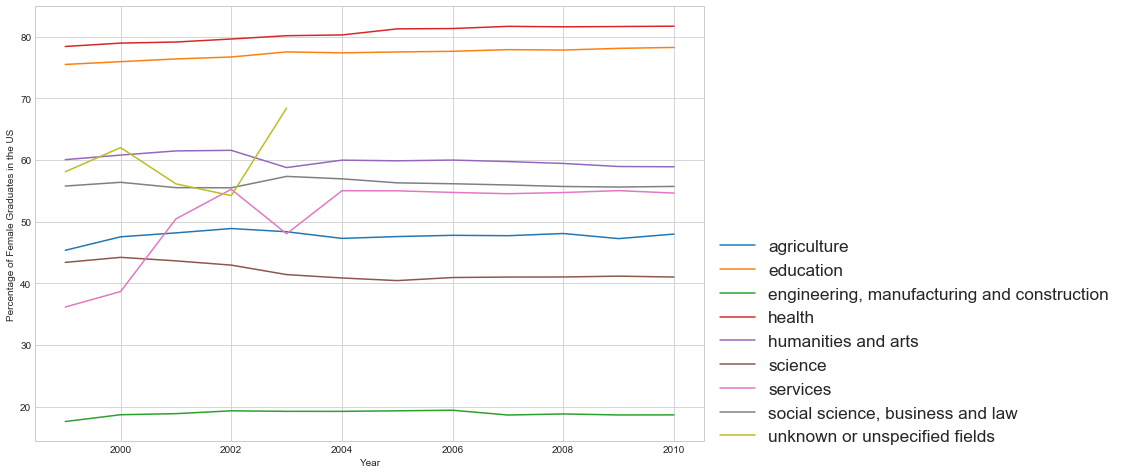

In [113]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')


fig = plt.figure(figsize=(12, 8))
ax = plt.axes()

for df in dfs:
    plt.plot('year', 'value', data=df, label=df.iloc[0]['indicator_name'])
    
plt.xlabel('Year')
plt.ylabel('Percentage of Female Graduates in the US')
ax.legend(bbox_to_anchor=(1, 0.5), fontsize='xx-large')